***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')
df = pd.DataFrame(dados)

### Visualize o conteúdo do DataFrame

In [3]:
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
label = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
freq = pd.value_counts(
    pd.cut(
        x=df.Renda,
        bins=classes,
        labels=label,
        include_lowest=True
    )
)
freq.head(5)

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percent = pd.value_counts(
    pd.cut(
        x=df['Renda'],
        bins=classes,
        labels=label,
        include_lowest=True
    ),
    normalize=True
) * 100
percent

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
dist_freq_percent = pd.DataFrame({'Frequência': freq, 'Porcentagem': percent})
dist_freq_percent.sort_index(ascending=False, inplace=True)
dist_freq_percent

,Frequência,Porcentagem
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot: ylabel='Porcentagem'>

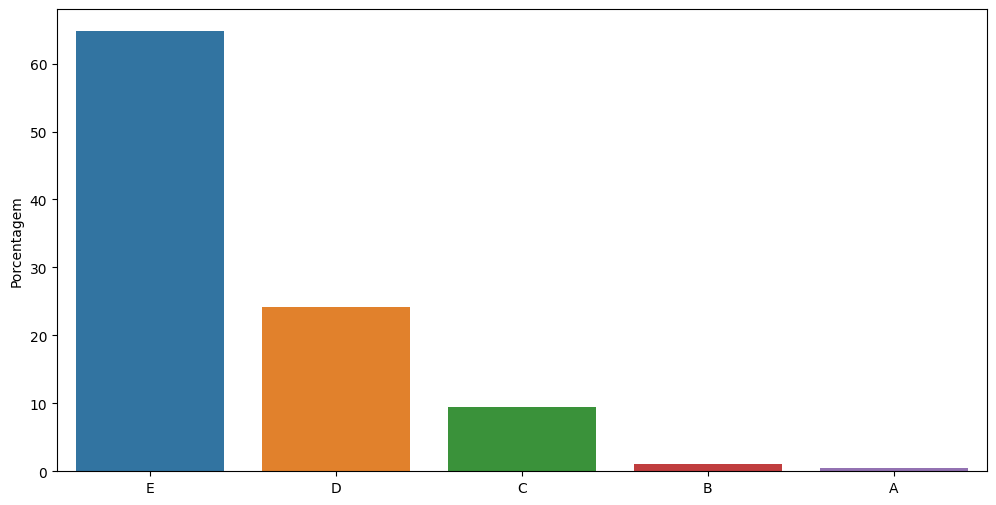

In [9]:
ax = sns.barplot(x= dist_freq_percent.index, y="Porcentagem", data=dist_freq_percent)
ax.figure.set_size_inches(12, 6)
ax

> ### Conclusões

Escreva suas conclusões aqui...

Posso visualizar uma grande massa dos dados com renda inferior a 20k, também é possível notar uma Assimetria à esquerda

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [10]:
df.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


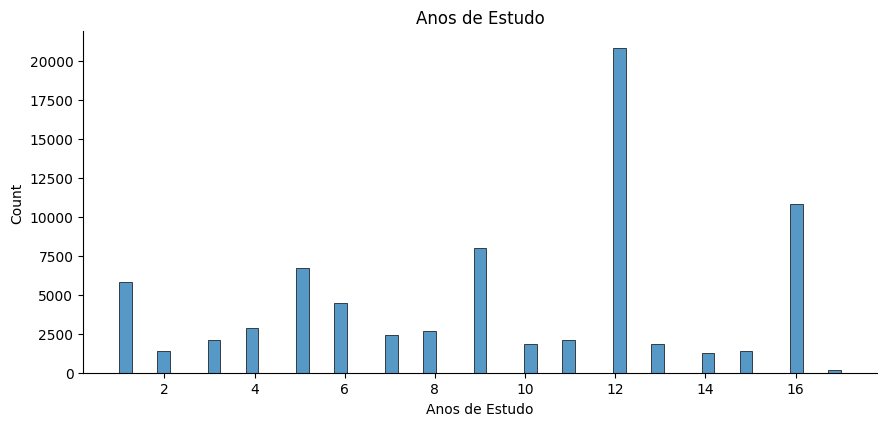

In [11]:
ax = sns.displot(data = df['Anos de Estudo'], kind='hist')
ax.figure.set_size_inches(10, 4)
ax.set(title = "Anos de Estudo")
ax

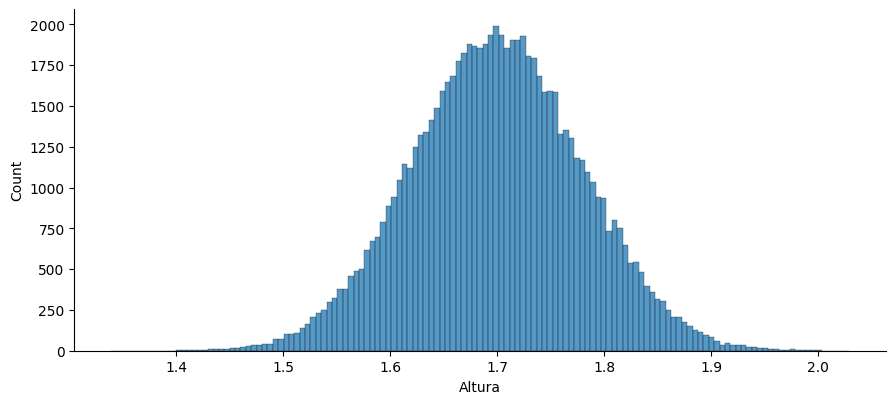

In [12]:
ax = sns.displot(df['Altura'], kind='hist')
ax.figure.set_size_inches(10, 4)
ax

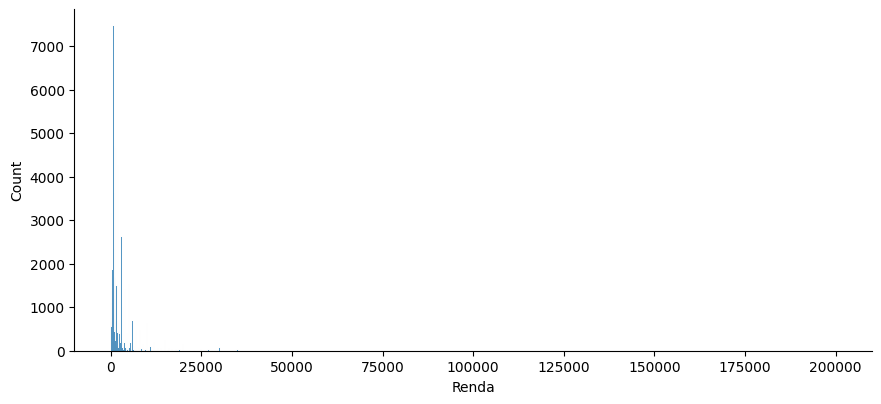

In [13]:
ax = sns.displot(data = df.Renda, kind='hist')
ax.figure.set_size_inches(10, 4)
ax

> ### Conclusões
Primeiramente sobre Anos de Estudo, posso visualizar uma Assimetria à direita, vendo que grande maioria possui 12 anos de estudo, o que corresponde ao ensino completo
Segundo lugar sobre a Altura, podemos visualizar uma Simetria, vendo que a grande maioria possui cerca de 1,70m, tendo em vista que a média brasileira é de 1,75m
Por último sobre a renda, posso visualizar tem tenho dados de RENDA até 200.000 reais, e também uma assimetria à esquerda, uma possível solução seria filtrar os dados de renda quem sejam menores que 20.000

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

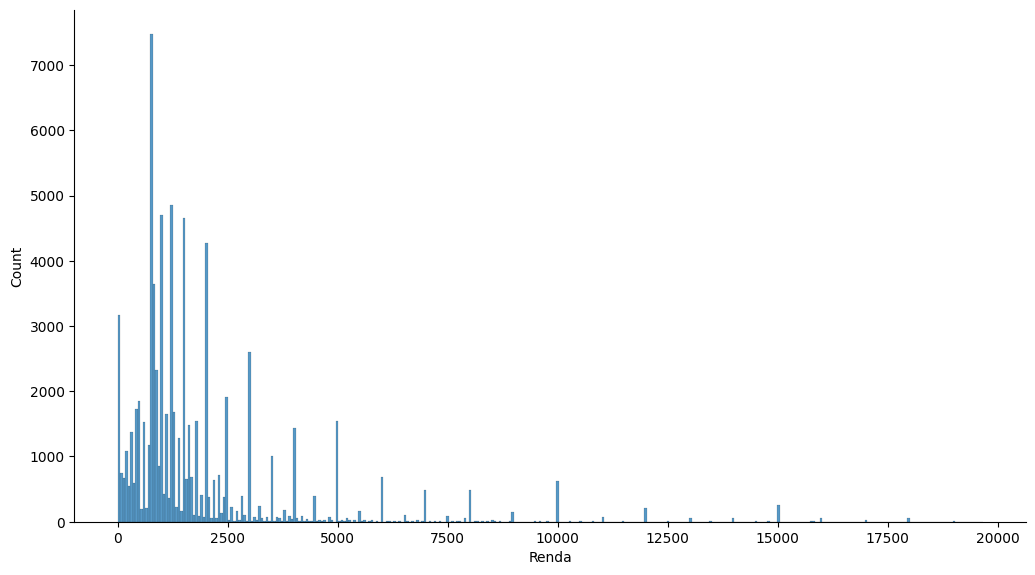

In [14]:
renda_filtrada = df.query('Renda < 20000')

ax = sns.displot(renda_filtrada['Renda'], kind='hist')
ax.figure.set_size_inches(12, 6)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:
df['Anos de Estudo'] = df['Anos de Estudo'].map(anos_de_estudo)
df['Cor'] = df['Cor'].map(cor)
df['Sexo'] = df['Sexo'].map(sexo)
df['UF'] = df['UF'].map(uf)
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631
...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,10 anos,812,1.687030
76836,Distrito Federal,Masculino,30,Preta,6 anos,1500,1.792934
76837,Distrito Federal,Masculino,32,Parda,11 anos,1300,1.830587
76838,Distrito Federal,Masculino,57,Parda,3 anos,1500,1.726344


In [17]:
freq = pd.crosstab(df.Sexo, df['Cor'])
freq.rename(index=sexo, inplace=True)
freq.rename(columns=cor, inplace=True)
freq

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [18]:
percent = pd.crosstab(df.Sexo, df['Cor'], normalize=True) * 100
percent.rename(index=sexo, inplace=True)
percent.rename(columns=cor, inplace=True)
percent

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [19]:
df['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [20]:
df.Renda.median()

1200.0

### Obtenha a moda

In [21]:
df['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [22]:
df.Renda.mad()

C:\Users\Guilherme Ramos\AppData\Local\Temp\ipykernel_10444\3405288081.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df.Renda.mad()


1526.4951371638058

### Obtenha a variância

In [23]:
df['Renda'].var()

11044906.006217021

### Obtenha o desvio-padrão

In [24]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
tendecia_central = pd.crosstab(df['Sexo'], df['Cor'], df['Renda'], aggfunc={'mean', 'median', 'max'})
tendecia_central.rename(index=sexo, inplace=True)
tendecia_central.rename(columns=cor, inplace=True)
tendecia_central 

max                                         mean               \
Cor       Amarela  Branca Indígena   Parda  Preta      Amarela       Branca   
Sexo                                                                          
Feminino    20000  100000   120000   30000  23000  3027.341880  2109.866750   
Masculino   50000  200000    10000  100000  50000  4758.251064  2925.744435   

                                                  median                   \
Cor           Indígena        Parda        Preta Amarela  Branca Indígena   
Sexo                                                                        
Feminino   2464.386139  1176.758516  1134.596400  1500.0  1200.0    788.0   
Masculino  1081.710938  1659.577425  1603.861687  2800.0  1700.0    797.5   

                           
Cor         Parda   Preta  
Sexo                       
Feminino    800.0   800.0  
Masculino  1200.0  1200.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [28]:
dispersao = pd.crosstab(df['Sexo'], df['Cor'], df['Renda'], aggfunc={'mad', 'var', 'std'})
dispersao.rename(index=sexo, inplace=True)
dispersao.rename(columns=cor, inplace=True)
dispersao

C:\Users\Guilherme Ramos\AppData\Local\Temp\ipykernel_10444\279168252.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao = pd.crosstab(df['Sexo'], df['Cor'], df['Renda'], aggfunc={'mad', 'var', 'std'})
C:\Users\Guilherme Ramos\AppData\Local\Temp\ipykernel_10444\279168252.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao = pd.crosstab(df['Sexo'], df['Cor'], df['Renda'], aggfunc={'mad', 'var', 'std'})
C:\Users\Guilherme Ramos\AppData\Local\Temp\ipykernel_10444\279168252.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dispersao = pd.crosstab(df['Sexo'], df['Cor'], df['Renda'], aggfunc={'mad', 'var', 'std'})
C:\Users\Guilher

mad                                                     \
Cor            Amarela       Branca     Indígena        Parda       Preta   
Sexo                                                                        
Feminino   2549.146322  1670.967106  3007.892952   811.580946  705.453357   
Masculino  3709.597211  2261.012346   798.910889  1125.827704  975.602482   

                  std                                                       \
Cor           Amarela       Branca      Indígena        Parda        Preta   
Sexo                                                                         
Feminino   3731.17366  3251.013154  11957.498292  1596.233048  1349.799809   
Masculino  5740.82482  4750.791872   1204.093490  2312.087184  1936.309271   

                    var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                         
Cor               Preta  
Sexo                     
Feminino   1.821960e+06  
Masculino  3.749294e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Renda', ylabel='Cor'>

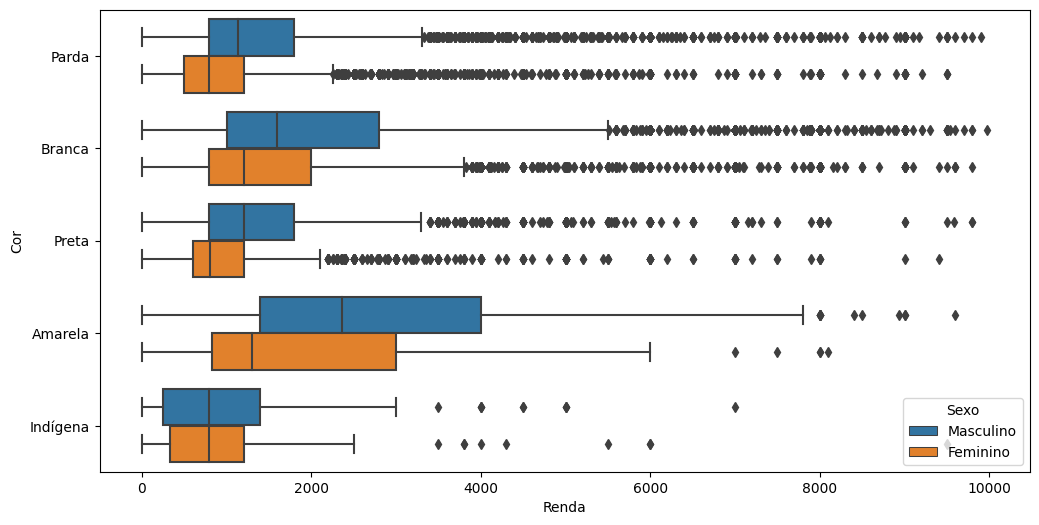

In [31]:
ax = sns.boxplot(data=df.query('Renda < 10000'), x='Renda', y='Cor', hue='Sexo')
ax.figure.set_size_inches(12, 6)
ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [34]:
from scipy import stats

porcentagem_salario_min = stats.percentileofscore(df['Renda'], 788, kind='weak')
porcentagem_salario_min

28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [35]:
df['Renda'].quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [37]:
valores_tenden_central = pd.crosstab(df['Anos de Estudo'], df['Cor'], df['Renda'], aggfunc={'mean', 'median', 'max', 'std'})
valores_tenden_central.rename(index=anos_de_estudo, inplace=True)
valores_tenden_central.rename(columns=cor, inplace=True)
valores_tenden_central

max                                \
Cor                             Amarela    Branca  Indígena     Parda   
Anos de Estudo                                                          
1 ano                             788.0   30000.0    2000.0   20000.0   
10 anos                          4000.0   18000.0    2500.0   45000.0   
11 anos                         50000.0  200000.0   10000.0   33400.0   
12 anos                          3500.0   30000.0  120000.0   20000.0   
13 anos                          8400.0   25000.0    4500.0   18000.0   
14 anos                         12000.0   50000.0    3800.0   30000.0   
15 anos ou mais                 28000.0  200000.0    9500.0  100000.0   
2 anos                            940.0   40000.0    2000.0   11000.0   
3 anos                           1000.0   80000.0    3000.0   20000.0   
4 anos                           4000.0   50000.0    1500.0   15000.0   
5 anos                           2500.0   30000.0    1675.0   35000.0   
6 anos                           2730.0   25000.0    2800.0   20000.0   
7 anos                           1800.0   40000.0    2500.0   15000.0   
8 anos                           7500.0   30000.0    4000.0   25000.0   
9 anos                           2000.0   60000.0    2500.0   10000.0   
Não determinados                    NaN    3600.0     800.0    7000.0   
Sem instrução e menos de 1 ano   2250.0   30000.0    2000.0    7000.0   

                                                mean               \
Cor                               Preta      Amarela       Branca   
Anos de Estudo                                                      
1 ano                            3500.0   394.000000   991.222527   
10 anos                         15000.0  1781.000000  1752.910141   
11 anos                         50000.0  2947.318182  2143.344648   
12 anos                         14000.0  1651.888889  2378.399310   
13 anos                         20000.0  3714.285714  3125.215686   
14 anos                         27000.0  4363.000000  3407.649418   
15 anos ou mais                 25000.0  6617.631579  5875.355727   
2 anos                          15000.0   940.000000  1001.106969   
3 anos                           5000.0   802.666667  1215.479010   
4 anos                           6000.0  1140.476190  1345.127097   
5 anos                           7000.0  1178.285714  1406.906250   
6 anos                           6000.0  1821.666667  1543.776744   
7 anos                          10000.0  1800.000000  1538.258511   
8 anos                           7000.0  1860.961538  1696.337847   
9 anos                          10000.0  1400.000000  1717.448029   
Não determinados                 3000.0          NaN  1194.709677   
Sem instrução e menos de 1 ano  10000.0   905.555556   993.123944   

                                                                        \
Cor                                 Indígena        Parda        Preta   
Anos de Estudo                                                           
1 ano                             608.800000   752.051313   698.597701   
10 anos                           850.083333  1345.508150  1358.652174   
11 anos                          1566.426829  1619.040140  1575.720594   
12 anos                         19882.142857  1846.374016  2038.433862   
13 anos                          2320.000000  2330.683190  2330.605263   
14 anos                          1996.666667  2688.111801  2711.181034   
15 anos ou mais                  3324.000000  4228.028040  3465.124457   
2 anos                            830.666667   755.618182   870.996169   
3 anos                            834.823529   862.308033   898.113573   
4 anos                            748.272727  1019.996374  1032.780980   
5 anos                            600.217391  1069.499147  1037.780115   
6 anos                           1114.583333  1155.877358  1075.772881   
7 anos                            755.500000  1151.678899  1189.803175   
8 anos    

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot: xlabel='Renda', ylabel='Anos de Estudo'>

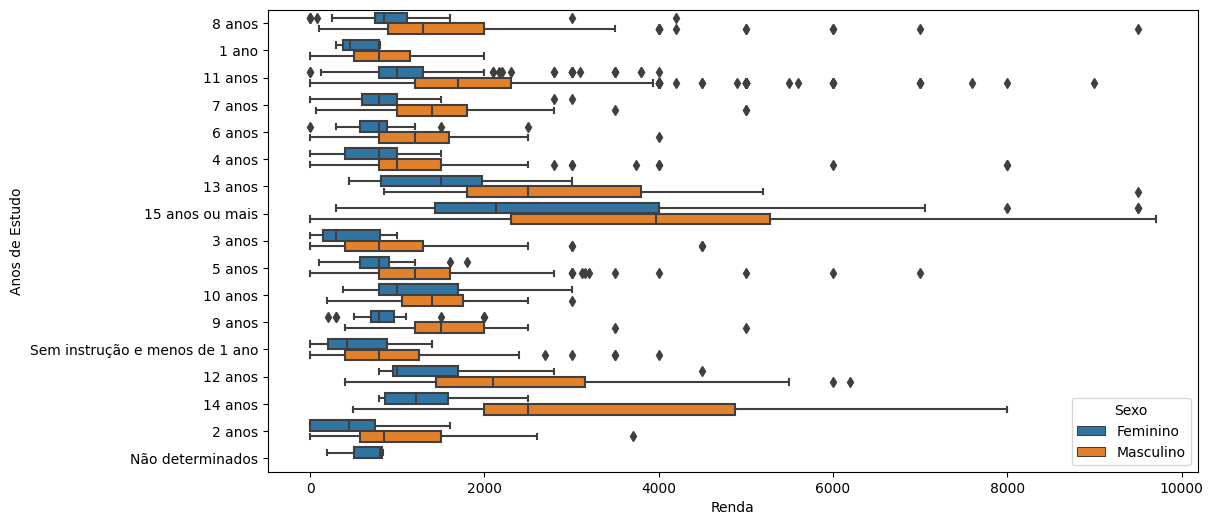

In [38]:
ax = sns.boxplot(data=df.query('Renda < 10000 and Idade == 40'), x='Renda', y='Anos de Estudo', hue='Sexo')
ax.figure.set_size_inches(12, 6)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [41]:
valores_tenden_central_ufs = df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
valores_tenden_central_ufs

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot: xlabel='Renda', ylabel='UF'>

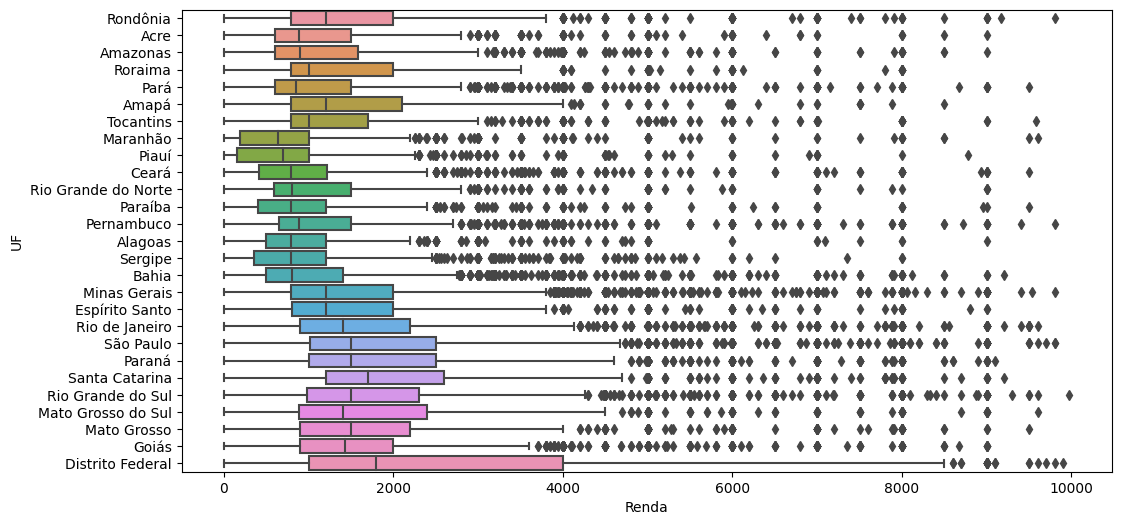

In [42]:
ax = sns.boxplot(data=df.query('Renda < 10000'), x='Renda', y='UF')
ax.figure.set_size_inches(12, 6)
ax

> ### Conclusões

Escreva suas conclusões aqui...